<a href="https://colab.research.google.com/github/KanclerzPiotr/Notebooks/blob/main/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.signal

In [ ]:
def f(t):
  return np.cos(2*t) + 3 * np.sin(t) - 0.5*np.sin(3*t)

def fp(t):
  return np.cos(2*t * 2 *np.pi)

def g(t):
  return np.cos((2 * t + 1)) - 2 * np.sin((t - 0.5) * 2 *np.pi)

In [ ]:
fs = np.pi/96
t = np.arange(0, 9+fs, fs)
N = len(t)
print((1/fs)/N)

0.11031678365936429


In [ ]:
1/(2*np.pi)

0.15915494309189535

In [ ]:
ft = f(t)
gt = g(t)
fpt = fp(t)

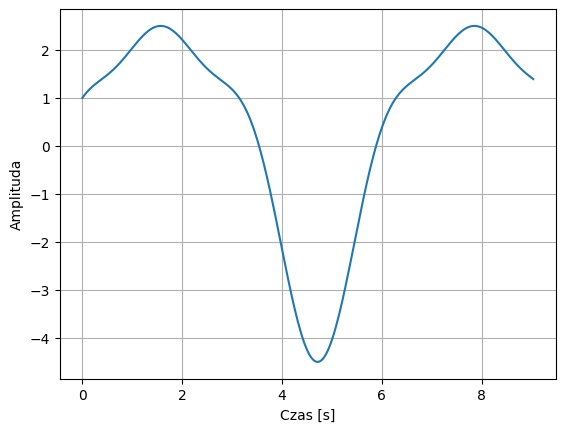

In [ ]:
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.grid()
plt.plot(t, ft)

In [ ]:
fft_ft = fft.fft(ft)
fft_t = fft.fftfreq(N, fs)


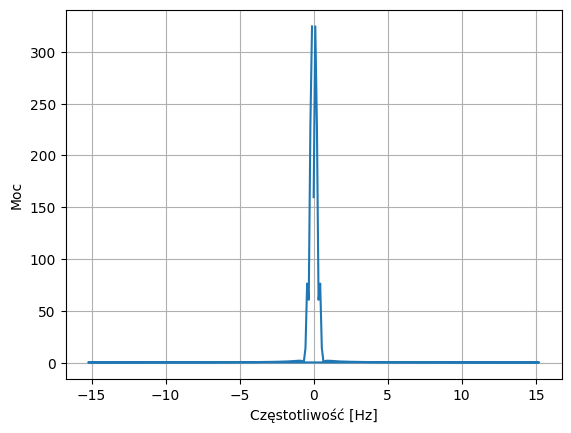

In [ ]:
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Moc")
plt.grid()
plt.plot(fft_t, np.abs(fft_ft))

In [ ]:
rfft_ft = fft.rfft(ft)
rfft_t = fft.rfftfreq(N, fs)
rfft_t

array([ 0.        ,  0.11090937,  0.22181874,  0.3327281 ,  0.44363747,
        0.55454684,  0.66545621,  0.77636558,  0.88727494,  0.99818431,
        1.10909368,  1.22000305,  1.33091242,  1.44182178,  1.55273115,
        1.66364052,  1.77454989,  1.88545926,  1.99636862,  2.10727799,
        2.21818736,  2.32909673,  2.4400061 ,  2.55091546,  2.66182483,
        2.7727342 ,  2.88364357,  2.99455294,  3.1054623 ,  3.21637167,
        3.32728104,  3.43819041,  3.54909978,  3.66000914,  3.77091851,
        3.88182788,  3.99273725,  4.10364662,  4.21455598,  4.32546535,
        4.43637472,  4.54728409,  4.65819346,  4.76910282,  4.88001219,
        4.99092156,  5.10183093,  5.2127403 ,  5.32364966,  5.43455903,
        5.5454684 ,  5.65637777,  5.76728714,  5.8781965 ,  5.98910587,
        6.10001524,  6.21092461,  6.32183398,  6.43274334,  6.54365271,
        6.65456208,  6.76547145,  6.87638082,  6.98729018,  7.09819955,
        7.20910892,  7.32001829,  7.43092766,  7.54183702,  7.65

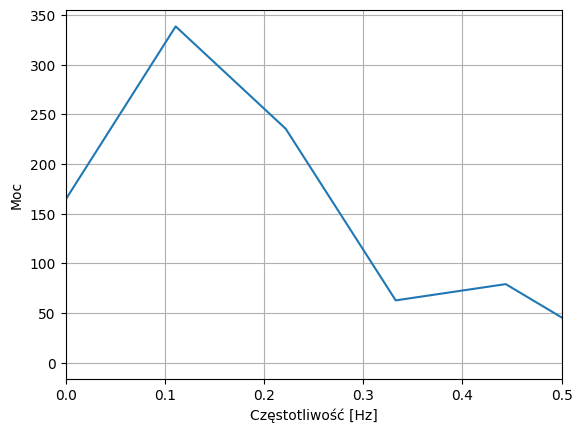

In [ ]:
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Moc")
plt.grid()
plt.xlim(0, 0.5)
plt.plot(rfft_t, np.abs(rfft_ft))


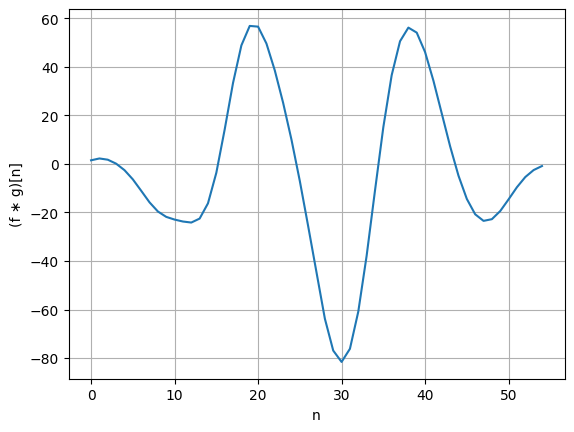

In [ ]:
conv = scipy.signal.convolve(ft, gt)
plt.ylabel('(f ∗ g)[n]')
plt.xlabel('n')
plt.grid()
plt.plot(conv)


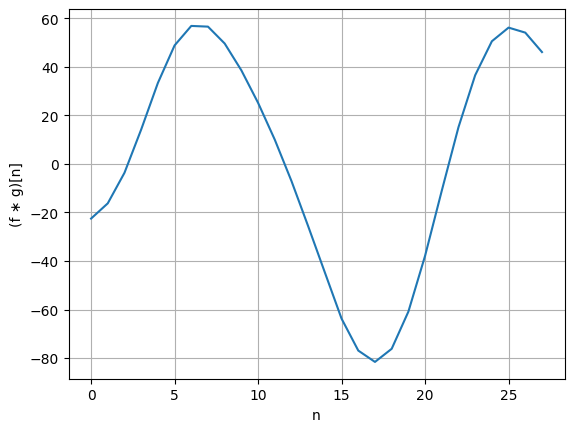

In [ ]:
conv = scipy.signal.convolve(ft, gt, 'same')
plt.ylabel('(f ∗ g)[n]')
plt.xlabel('n')
plt.grid()
plt.plot(conv)

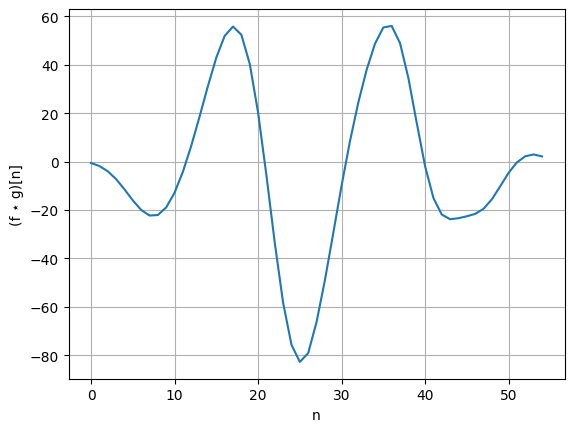

In [ ]:
cor = scipy.signal.correlate(ft, gt)
plt.ylabel('(f ⋆ g)[n]')
plt.xlabel('n')
plt.grid()
plt.plot(cor)

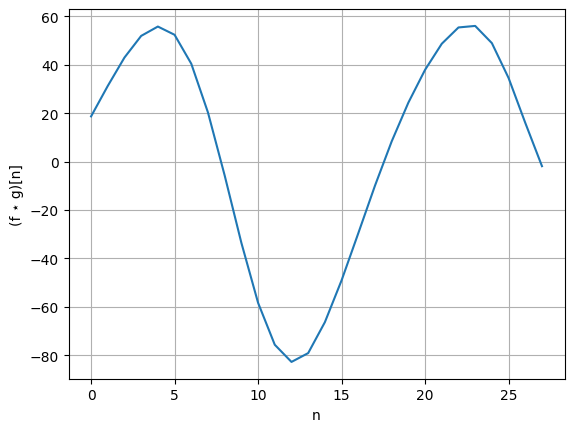

In [ ]:
cor = scipy.signal.correlate(ft, gt, 'same')
plt.ylabel('(f ⋆ g)[n]')
plt.xlabel('n')
plt.grid()
plt.plot(cor)

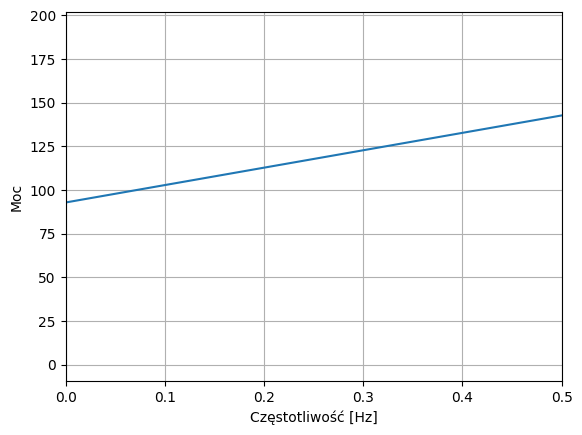

In [ ]:
rfft_t = fft.rfftfreq(N, T)
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Moc")
plt.grid()
plt.xlim(0, 0.5)
plt.plot(rfft_t, np.abs(rfft_ft))
copy = rfft_ft.copy()

In [ ]:
1/ (2 * np.pi)

0.15915494309189535

In [ ]:
irfft_ft = scipy.fft.irfft(rfft_ft)
rfft_ft[1:3] = 0
irfft_ft_filtered = scipy.fft.irfft(rfft_ft)
rfft_ft[0] = 0
irfft_ft_filtered2 = scipy.fft.irfft(rfft_ft)

ValueError: x and y must have same first dimension, but have shapes (283,) and (15,)

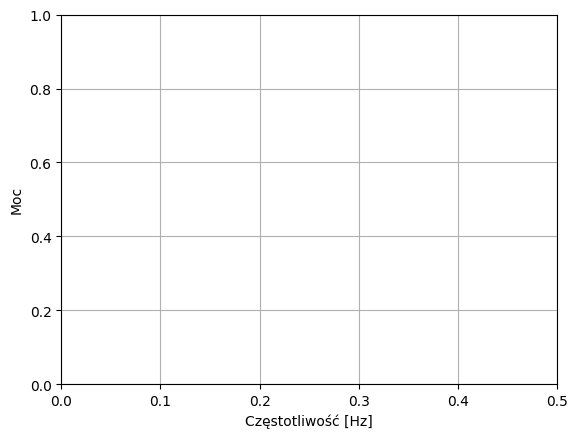

In [ ]:
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Moc")
plt.grid()
plt.xlim(0, 0.5)
plt.plot(rfft_t, np.abs(rfft_ft), rfft_t, np.abs(copy))
plt.legend(["f(t)", '"Odfiltrowane" trzy kubełki'])

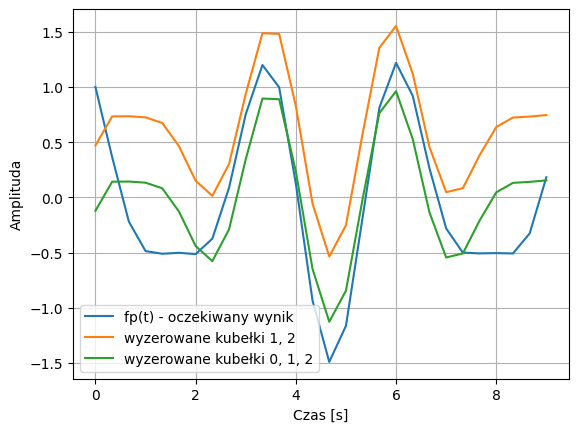

In [ ]:
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.grid()

plt.plot(t, fpt, t, irfft_ft_filtered, t, irfft_ft_filtered2)
plt.legend(["fp(t) - oczekiwany wynik", "wyzerowane kubełki 1, 2", 'wyzerowane kubełki 0, 1, 2'])

In [ ]:
x = [ 2**n for n in range(6)]
def s(x, frac):
  return [ 1/ ((1 - frac) + (frac / n)) for n in x]
def b(x, frac):
  s = 1 - frac
  return [ n - s * (n - 1) for n in x]


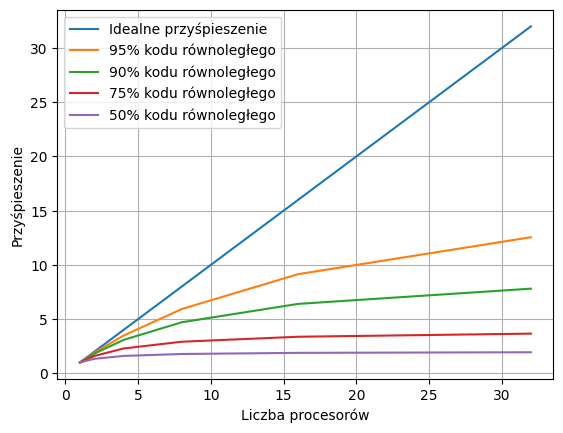

In [ ]:
plt.xlabel("Liczba procesorów")
plt.ylabel("Przyśpieszenie")
plt.grid()
plt.plot(x, s(x, 1), x, s(x, 0.95), x, s(x, 0.9), x, s(x, 0.75), x, s(x, 0.5))
plt.legend(["Idealne przyśpieszenie", "95% kodu równoległego", "90% kodu równoległego", "75% kodu równoległego", "50% kodu równoległego"])

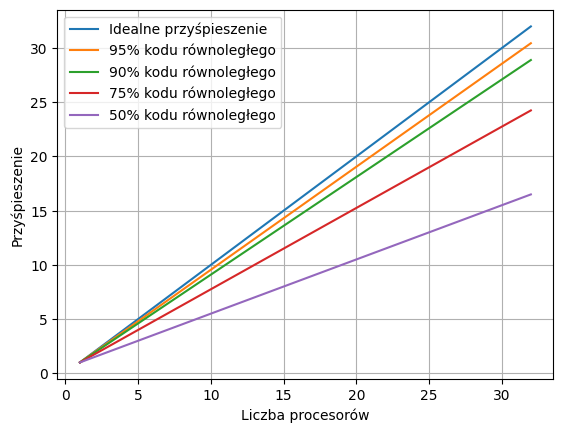

In [ ]:
plt.xlabel("Liczba procesorów")
plt.ylabel("Przyśpieszenie")
plt.grid()
plt.plot(x, b(x, 1), x, b(x, 0.95), x, b(x, 0.9), x, b(x, 0.75), x, b(x, 0.5))
plt.legend(["Idealne przyśpieszenie", "95% kodu równoległego", "90% kodu równoległego", "75% kodu równoległego", "50% kodu równoległego"])